# Testing spike sorters

Alessio: Include the kilosorts, ironclust, spyking circus, mountainsort.

### Get tools and data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams.update({'font.size':20})

import spikeinterface.extractors as se
import spikeinterface.widgets as sw
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
#from spikeextractors.extractors.axonaunitrecordingextractor import AxonaUnitRecordingExtractor

print(sys.version, sys.platform, sys.executable)

13:55:59 [I] klustakwik KlustaKwik2 version git-90568916-dirty


3.8.2 (default, Apr 27 2020, 15:53:34) 
[GCC 9.3.0] linux /mnt/d/spikeinterface/hussaini-to-nwb/venv/bin/python3


In [3]:
# Use 20201004_Raw if you want to have more data (useful for spikesorting!) - this is ~10 min

import os

dir_name = r'../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_raw'
base_filename = '20201004_Raw'  #'axona_raw'
filename = os.path.join(dir_name, base_filename)

/mnt/d/spikeinterface/hussaini-to-nwb/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Load cached state to continue session (from milestone2_modular_pipeline)

r_cache = se.load_extractor_from_pickle(os.path.join(dir_name, 'cached_data_preproc.pkl'))

In [5]:
print('duration of recording in seconds: {}'.format(r_cache.get_num_frames() / r_cache.get_sampling_frequency()))

duration of recording in seconds: 10.0


### Ironclust (works)

In [10]:
# Set ironclust path (ironclust uses Matlab)

ss.IronClustSorter.set_ironclust_path('../specific_spikesorters/ironclust')
ss.IronClustSorter.ironclust_path

Setting IRONCLUST_PATH environment variable for subprocess calls to: /mnt/d/spikeinterface/hussaini-to-nwb/../specific_spikesorters/ironclust


'/mnt/d/spikeinterface/hussaini-to-nwb/../specific_spikesorters/ironclust'

In [11]:
ss.installed_sorters()

['herdingspikes', 'ironclust', 'klusta', 'mountainsort4', 'spykingcircus']

In [12]:
# run spike sorting by group 
sorting_IC = ss.run_ironclust(
    r_cache, 
    os.path.join(dir_name, 'ironclust_group'), 
    grouping_property='group', 
    parallel=True, 
    verbose=True
)
print(f'IronClust found {len(sorting_IC.get_unit_ids())} units')

Writing to binary .dat file: 100%|##########| 1/1 [00:00<00:00,  3.24it/s]


ironclust run time 119.99s
IronClust found 6 units


### Mountainsort4 (fails)
seems to be due to `multiprocessing` and `loky` interaction

In [6]:
# Takes very, very long, why?! It breaks: "cannot find context for loky"

In [16]:
ss.get_default_params('mountainsort4')

{'detect_sign': -1,
 'adjacency_radius': -1,
 'freq_min': 300,
 'freq_max': 6000,
 'filter': True,
 'whiten': True,
 'curation': False,
 'num_workers': None,
 'clip_size': 50,
 'detect_threshold': 3,
 'detect_interval': 10,
 'noise_overlap_threshold': 0.15}

In [8]:
ss.get_params_description('mountainsort4')

{'detect_sign': 'Use -1 (negative) or 1 (positive) depending on the sign of the spikes in the recording',
 'adjacency_radius': 'Radius in um to build channel neighborhood (Use -1 to include all channels in every neighborhood)',
 'freq_min': 'High-pass filter cutoff frequency',
 'freq_max': 'Low-pass filter cutoff frequency',
 'filter': 'Enable or disable filter',
 'whiten': 'Enable or disable whitening',
 'curation': 'Enable or disable curation',
 'num_workers': 'Number of workers (if None, half of the cpu number is used)',
 'clip_size': 'Number of samples per waveform',
 'detect_threshold': 'Threshold for spike detection',
 'detect_interval': 'Minimum number of timepoints between events detected on the same channel',
 'noise_overlap_threshold': 'Noise overlap threshold for automatic curation'}

In [9]:
# run spike sorting by group
sorting_MS4 = ss.run_mountainsort4(
    r_cache,
    os.path.join(dir_name, 'mountainsort4_group'),
    grouping_property='group',
    parallel=True,
    verbose=True,
    filter=False,  # we already filtered
    num_workers=1
)
print(f'Mountainsort4 found {len(sorting_MS4.get_unit_ids())} units')

/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(end_frame, (float, np.float))

KeyboardInterrupt: 

In [ ]:
print(f'Spike train of a unit: {sorting_MS4.get_unit_spike_train(1)}')

### Kilosort (fails )
I don't have a CUDA compatible graphics card

In [13]:
# Add repository path to spikesorters object

ss.KilosortSorter.set_kilosort_path('../specific_spikesorters/KiloSort')
ss.KilosortSorter.kilosort_path

Setting KILOSORT_PATH environment variable for subprocess calls to: /mnt/d/spikeinterface/hussaini-to-nwb/../specific_spikesorters/KiloSort


'/mnt/d/spikeinterface/hussaini-to-nwb/../specific_spikesorters/KiloSort'

In [23]:
ss.get_default_params('kilosort')

{'detect_threshold': 6,
 'car': True,
 'useGPU': True,
 'freq_min': 300,
 'freq_max': 6000,
 'ntbuff': 64,
 'Nfilt': None,
 'NT': None,
 'chunk_mb': 500,
 'n_jobs_bin': 1}

In [15]:
ss.get_params_description('kilosort')

{'detect_threshold': 'Threshold for spike detection',
 'car': 'Enable or disable common reference',
 'useGPU': 'Enable or disable GPU usage',
 'freq_min': 'High-pass filter cutoff frequency',
 'freq_max': 'Low-pass filter cutoff frequency',
 'ntbuff': 'Samples of symmetrical buffer for whitening and spike detection',
 'Nfilt': 'Number of clusters to use (if None it is automatically computed)',
 'NT': 'Batch size (if None it is automatically computed)',
 'chunk_mb': 'Chunk size in Mb for saving to binary format (default 500Mb)',
 'n_jobs_bin': 'Number of jobs for saving to binary format (Default 1)'}

In [25]:
sorting_KS = ss.run_kilosort(
    r_cache,
    os.path.join(dir_name, 'kilosort_group'),
    grouping_property='group',
    parallel=True,
    verbose=True
)
print(f'Kilosort found {len(sorting_KS.get_unit_ids())} units')

/mnt/d/spikeinterface/spikeextractors/spikeextractors/baseextractor.py:607: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif isinstance(v, (np.int, np.int32, np.int64)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/baseextractor.py:609: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guida

SpikeSortingError: Spike sorting failed: kilosort returned a non-zero exit code. You can inspect the runtime trace in the kilosort.log of the output folder.'

### Kilosort2 (fails)
I don't have a CUDA compatible graphics card

Also doesn't seem to find the installation.

In [46]:
# Add repository path to spikesorters object

ss.Kilosort2Sorter.set_kilosort2_path('../specific_spikesorters/Kilosort2')
ss.Kilosort2Sorter.kilosort2_path

Setting KILOSORT2_PATH environment variable for subprocess calls to: /mnt/d/spikeinterface/hussaini-to-nwb/../specific_spikesorters/Kilosort2


'/mnt/d/spikeinterface/hussaini-to-nwb/../specific_spikesorters/Kilosort2'

In [47]:
ss.get_default_params('kilosort2')

{'detect_threshold': 6,
 'projection_threshold': [10, 4],
 'preclust_threshold': 8,
 'car': True,
 'minFR': 0.1,
 'minfr_goodchannels': 0.1,
 'freq_min': 150,
 'sigmaMask': 30,
 'nPCs': 3,
 'ntbuff': 64,
 'nfilt_factor': 4,
 'NT': None,
 'keep_good_only': False,
 'chunk_mb': 500,
 'n_jobs_bin': 1}

In [48]:
ss.get_params_description('kilosort2')

{'detect_threshold': 'Threshold for spike detection',
 'projection_threshold': 'Threshold on projections',
 'preclust_threshold': 'Threshold crossings for pre-clustering (in PCA projection space)',
 'car': 'Enable or disable common reference',
 'minFR': 'Minimum spike rate (Hz), if a cluster falls below this for too long it gets removed',
 'minfr_goodchannels': "Minimum firing rate on a 'good' channel",
 'freq_min': 'High-pass filter cutoff frequency',
 'sigmaMask': 'Spatial constant in um for computing residual variance of spike',
 'nPCs': 'Number of PCA dimensions',
 'ntbuff': 'Samples of symmetrical buffer for whitening and spike detection',
 'nfilt_factor': 'Max number of clusters per good channel (even temporary ones) 4',
 'NT': 'Batch size (if None it is automatically computed)',
 'keep_good_only': "If True only 'good' units are returned",
 'chunk_mb': 'Chunk size in Mb for saving to binary format (default 500Mb)',
 'n_jobs_bin': 'Number of jobs for saving to binary format (Defau

In [49]:
sorting_KS2 = ss.run_kilosort2(
    r_cache,
    os.path.join(dir_name, 'kilosort2_group'),
    grouping_property='group',
    parallel=True,
    verbose=True
)
print(f'Kilosort found {len(sorting_KS2.get_unit_ids())} units')

AssertionError: The sorter kilosort2 is not installed.
        Please install it with:  

To use Kilosort2 run:

        >>> git clone https://github.com/MouseLand/Kilosort2
    and provide the installation path by setting the KILOSORT2_PATH
    environment variables or using Kilosort2Sorter.set_kilosort2_path().



    More information on Kilosort2 at:
        https://github.com/MouseLand/Kilosort2
     

### Kilosort2.5 (fails)

Still no CUDA. 

Still doesn't find installation folder?!

In [50]:
# Add repository path to spikesorters object

ss.Kilosort2_5Sorter.set_kilosort2_5_path('../specific_spikesorters/kilosort25/kilosort')

Setting KILOSORT2_5_PATH environment variable for subprocess calls to: /mnt/d/spikeinterface/hussaini-to-nwb/../specific_spikesorters/kilosort25/kilosort


In [51]:
sorting_KS25 = ss.run_kilosort2_5(
    r_cache,
    os.path.join(dir_name, 'kilosort25_group'),
    grouping_property='group',
    parallel=True,
    verbose=True
)
print(f'Kilosort found {len(sorting_KS25.get_unit_ids())} units')

AssertionError: The sorter kilosort2_5 is not installed.
        Please install it with:  

To use Kilosort2.5 run:

        >>> git clone https://github.com/MouseLand/Kilosort
    and provide the installation path by setting the KILOSORT2_5_PATH
    environment variables or using Kilosort2_5Sorter.set_kilosort2_5_path().



    More information on Kilosort2.5 at:
        https://github.com/MouseLand/Kilosort
     

### SpykingCircus

In [56]:
ss.get_default_params('spykingcircus')

{'detect_sign': -1,
 'adjacency_radius': 100,
 'detect_threshold': 6,
 'template_width_ms': 3,
 'filter': True,
 'merge_spikes': True,
 'auto_merge': 0.75,
 'num_workers': None,
 'whitening_max_elts': 1000,
 'clustering_max_elts': 10000}

In [57]:
ss.get_params_description('spykingcircus')

{'detect_sign': 'Use -1 (negative), 1 (positive) or 0 (both) depending on the sign of the spikes in the recording',
 'adjacency_radius': 'Radius in um to build channel neighborhood',
 'detect_threshold': 'Threshold for spike detection',
 'template_width_ms': 'Template width in ms. Recommended values: 3 for in vivo - 5 for in vitro',
 'filter': 'Enable or disable filter',
 'merge_spikes': 'Enable or disable automatic mergind',
 'auto_merge': 'Automatic merging threshold',
 'num_workers': 'Number of workers (if None, half of the cpu number is used)',
 'whitening_max_elts': 'Max number of events per electrode for whitening',
 'clustering_max_elts': 'Max number of events per electrode for clustering'}

In [58]:
sorting_SC = ss.run_mountainsort4(
    r_cache,
    os.path.join(dir_name, 'mountainsort4_group'),
    grouping_property='group',
    parallel=True,
    verbose=True
)
print(f'Spyking Circus found {len(sorting_SC.get_unit_ids())} units')

/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(end_frame, (float, np.float))

KeyboardInterrupt: 

### Look at some sorting output

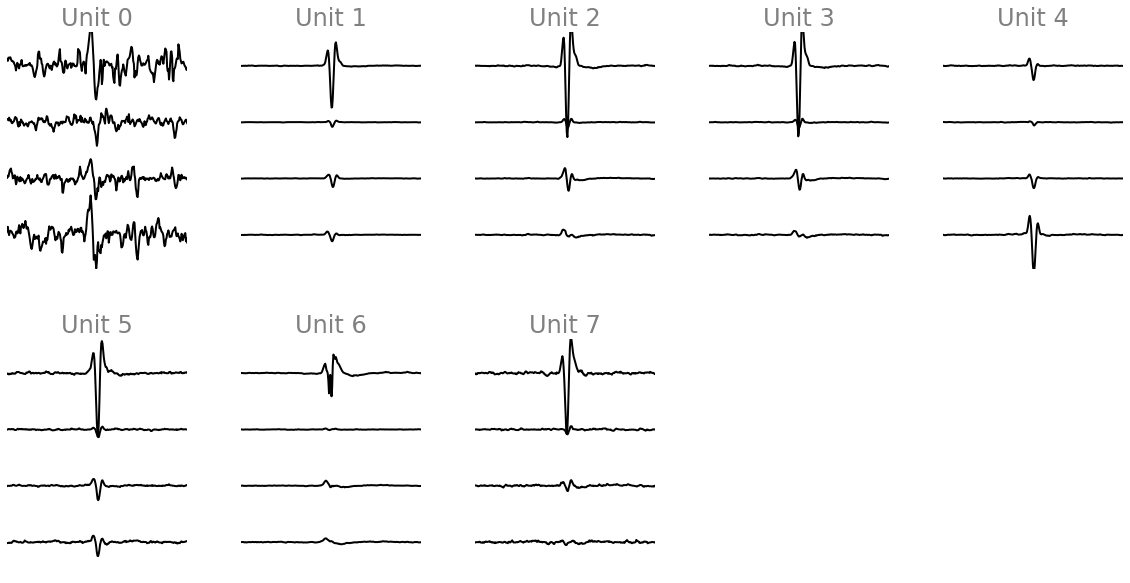

In [52]:
# Inspect waveforms

w_wf = sw.plot_unit_templates(sorting=sorting_IC, recording=r_cache, unit_ids=[0,1,2,3,4,5,6,7])

/mnt/d/spikeinterface/hussaini-to-nwb/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is

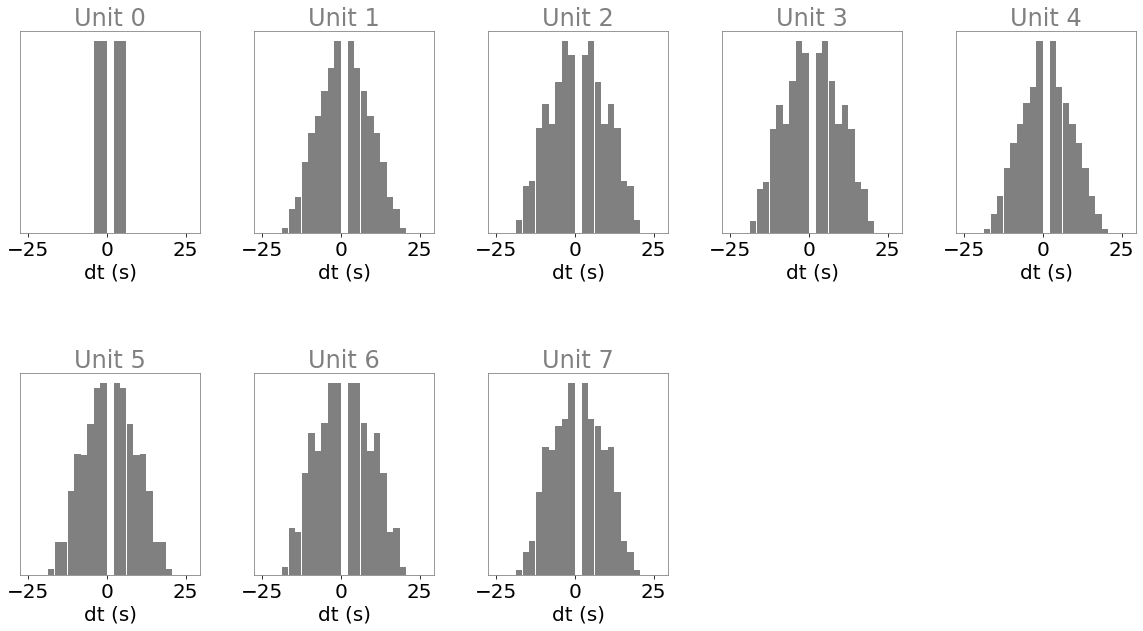

In [53]:
w_acc = sw.plot_autocorrelograms(sorting_KL, unit_ids=[0,1,2,3,4,5,6,7])

### Compute extracellular features

Extracellular features, such as peak to valley duration or full-width half maximum, are important to classify neurons into putative classes (excitatory - inhibitory). The postprocessing module of spiketoolkit allows one to compute several of these features:

In [54]:
st.postprocessing.get_template_features_list()

/mnt/d/spikeinterface/hussaini-to-nwb/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['peak_to_valley',
 'halfwidth',
 'peak_trough_ratio',
 'repolarization_slope',
 'recovery_slope']

In [55]:
features = st.postprocessing.compute_unit_template_features(
    r_cache, 
    sorting_KL, 
    as_dataframe=True, 
    upsampling_factor=10
)
display(features)

/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(end_frame, (float, np.float))

,peak_to_valley,halfwidth,peak_trough_ratio,repolarization_slope,recovery_slope
0,0.002742,0.002621,-0.670719,1.427086e+08,-3.507819e+07
1,0.000129,0.000100,-0.560508,3.415068e+08,-1.114879e+07
2,0.000125,0.000096,-0.651688,6.037692e+08,-2.476658e+07
3,0.000131,0.000098,-0.638373,5.687902e+08,-2.317511e+07
4,0.000129,0.000102,-0.308790,2.717318e+08,-4.220511e+06
5,0.000131,0.000106,-0.513992,4.840509e+08,-1.750573e+07
6,0.000065,0.000125,-0.803630,4.543411e+08,-1.657060e+07
7,0.000140,0.000104,-0.592804,4.690690e+08,-2.058033e+07
8,0.001088,0.002194,-0.675851,3.083532e+08,-4.354359e+06
9,0.000052,0.000065,-0.705869,6.500063e+08,-1.068880e+07


We can either compute one metric at a time, or compute a subset of metrics using the compute_quality_metrics function:

In [56]:
duration = recording.get_num_frames()
isi_violations = st.validation.compute_isi_violations(sorting_KL, duration_in_frames=duration)
print('ISI violations:', isi_violations)

snrs = st.validation.compute_snrs(sorting_KL, r_cache)
print('SNRs:', snrs)

/mnt/d/spikeinterface/hussaini-to-nwb/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is

ISI violations: [   0.           18.00772984   17.56975695   17.47843135   18.79942567
   12.95014785   58.3321749    29.74372331    0.           47.24696774
   21.46099412   12.63196166   24.86428386    2.65670534   39.98653705
    0.            2.78327689    8.23786511    2.47954077    0.
    0.         1664.46858926   14.42664523   70.36446827    0.        ]
SNRs: [ 5.390336   5.5181527  9.442562   9.343866   4.833367   8.16025
  3.0658774  8.064291   8.732708   5.2863336  5.6609693  6.552438
  5.5207343 13.63063    3.9273896  3.0737364  5.4742775  3.3018587
  4.5205207  4.327707   4.8181114  5.8060265  5.852221   5.799432
  4.0707364]


In [57]:
quality_metrics = st.validation.compute_quality_metrics(
    sorting_KL, 
    r_cache, 
    metric_names=['firing_rate', 'isi_violation', 'snr'], 
    as_dataframe=True
)
display(quality_metrics)

,firing_rate,isi_violation,snr
0,0.25,0.000000,5.390336
1,169.95,0.600251,5.518153
2,56.40,0.585652,9.442562
3,51.20,0.582608,9.343866
4,70.20,0.626641,4.833367
5,10.80,0.431667,8.160250
6,62.60,1.944386,3.065877
7,9.20,0.991447,8.064291
8,0.10,0.000000,8.732708
9,13.85,1.574883,5.286334


# 6. Curation

### a) Manual curation using Phy¶

In [58]:
st.postprocessing.export_to_phy(
    r_cache, 
    sorting_KL, 
    output_folder='phy_KL',
    grouping_property='group', 
    verbose=True, 
    recompute_info=True
)

/mnt/d/spikeinterface/hussaini-to-nwb/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is

Converting to Phy format
Number of chunks: 1 - Number of jobs: 1


Extracting waveforms in chunks: 100%|##########| 1/1 [00:01<00:00,  1.19s/it]


Fitting PCA of 3 dimensions on 20601 waveforms
Projecting waveforms on PC


/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(end_frame, (float, np.float))

'location' property is not available and it will be linear.
Saving files
Saved phy format to:  /mnt/d/spikeinterface/hussaini-to-nwb/phy_KL
Run:

phy template-gui  /mnt/d/spikeinterface/hussaini-to-nwb/phy_KL/params.py


In [59]:
%%capture --no-display
!phy template-gui phy_KL/params.py

/mnt/d/spikeinterface/hussaini-to-nwb/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


After curating the results we can reload it using the PhySortingExtractor:

In [60]:
sorting_KL_phy_curated = se.PhySortingExtractor('phy_KL/', exclude_cluster_groups=['noise'])

/mnt/d/spikeinterface/spikeextractors/spikeextractors/extractors/phyextractors/phyextractors.py:145: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(row[1], (int, np.int, float, np.float, str)) and len(row) == 2:
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extractors/phyextractors/phyextractors.py:145: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar typ

In [61]:
print(len(sorting_KL_phy_curated.get_unit_ids()))
print(f"Unit ids after manual curation: {sorting_KL_phy_curated.get_unit_ids()}")

25
Unit ids after manual curation: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


### b) Automatic curation based on quality metrics

In [62]:
snr_thresh = 5
isi_viol_thresh = 0.5

In [63]:
sorting_auto = st.curation.threshold_isi_violations(sorting_KL, isi_viol_thresh, 'greater', duration)

In [64]:
len(sorting_auto.get_unit_ids())

6

In [65]:
sorting_auto = st.curation.threshold_snrs(sorting_auto, r_cache, snr_thresh, 'less')

In [66]:
len(sorting_auto.get_unit_ids())

3

### c) Consensus-based curation

Can we combine the output of multiple sorters to curate the spike sorting output?

To answer this question we can use the comparison module. We first compare and match the output spike trains of the different sorters, and we can then extract a new SortingExtractor with only the units in agreement.

In [67]:
mcmp = sc.compare_multiple_sorters([sorting_KL, sorting_IC], ['KL', 'IC'], spiketrain_mode='union',
                                   verbose=True)

Multicomaprison step 1: pairwise comparison
  Comparing:  KL  and  IC
Multicomaprison step 2: make graph
Multicomaprison step 3: clean graph
Removed 0 duplicate nodes
Multicomaprison step 4: extract agreement from graph


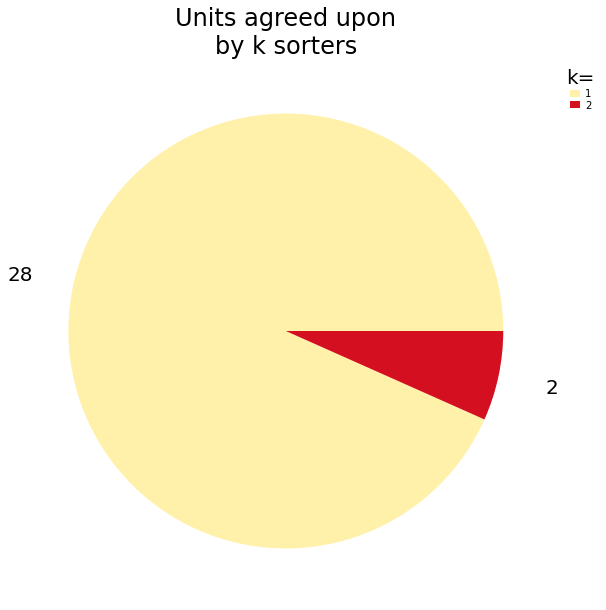

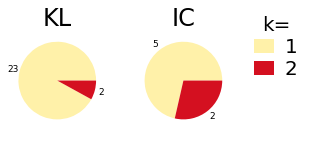

In [68]:
w = sw.plot_multicomp_agreement(mcmp)
w = sw.plot_multicomp_agreement_by_sorter(mcmp)

In [69]:
agreement_sorting = mcmp.get_agreement_sorting(minimum_agreement_count=2)

In [70]:
agreement_sorting.get_unit_ids()

[13, 20]

In [71]:
cmp_manual_agr = sc.compare_sorter_to_ground_truth(sorting_IC_phy_curated, agreement_sorting)

NameError: name 'sorting_IC_phy_curated' is not defined

In [ ]:
w_agr = sw.plot_agreement_matrix(cmp_manual_agr)

In [ ]:
st.postprocessing.export_to_phy(recording_cache, 
                                agreement_sorting, output_folder='phy_AGR',
                                grouping_property='group', verbose=True, recompute_info=True)

In [ ]:
%%capture --no-display
!phy template-gui phy_AGR/params.py

# 7. Save to / load from NWB

In [ ]:
# TODO ...

In [ ]:
metadata = {'Ecephys': {'Device': [{'name': 'open-ephys',
                                    'description': 'Open Ephys acquisition board'}]}}

In [ ]:
se.NwbRecordingExtractor.write_recording(recording_cache, 'si_tutorial.nwb', metadata=metadata)

In [ ]:
se.NwbSortingExtractor.write_sorting(sorting_IC, 'si_tutorial.nwb')

In [ ]:
recording_nwb = se.NwbRecordingExtractor('si_tutorial.nwb')
sorting_nwb = se.NwbSortingExtractor('si_tutorial.nwb')

# 8. Save to / load from TINT


In [ ]:
# TODO ...

In [ ]:
# eof